## Importing Necessary modules

In [156]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [29]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
)

training_set = train_datagen.flow_from_directory(
    'aug_data/train',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary',
)

Found 682 images belonging to 2 classes.


In [30]:
test_datagen = ImageDataGenerator(
    rescale = 1./255
)

test_set = test_datagen.flow_from_directory(
    'aug_data/test',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 170 images belonging to 2 classes.


## Building the Model

In [148]:
model=Sequential()


model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Flatten())

model.add(Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(32,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

In [149]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_95 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 8, 8, 32)        

In [151]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [152]:
history=model.fit(training_set,epochs=15,validation_data=test_set)

Train for 22 steps, validate for 6 steps
Epoch 1/15
22/22 [==============================] - 2s 90ms/step - loss: 0.8210 - accuracy: 0.4883 - val_loss: 0.8016 - val_accuracy: 0.5529
Epoch 2/15
22/22 [==============================] - 1s 45ms/step - loss: 0.7887 - accuracy: 0.5176 - val_loss: 0.7753 - val_accuracy: 0.5294
Epoch 3/15
22/22 [==============================] - 1s 44ms/step - loss: 0.7640 - accuracy: 0.5176 - val_loss: 0.7555 - val_accuracy: 0.5294
Epoch 4/15
22/22 [==============================] - 1s 44ms/step - loss: 0.7478 - accuracy: 0.5381 - val_loss: 0.7419 - val_accuracy: 0.5294
Epoch 5/15
22/22 [==============================] - 1s 44ms/step - loss: 0.7383 - accuracy: 0.5484 - val_loss: 0.7311 - val_accuracy: 0.5412
Epoch 6/15
22/22 [==============================] - 1s 45ms/step - loss: 0.6951 - accuracy: 0.5836 - val_loss: 0.6932 - val_accuracy: 0.6353
Epoch 7/15
22/22 [==============================] - 1s 43ms/step - loss: 0.6435 - accuracy: 0.7053 - val_loss: 0.

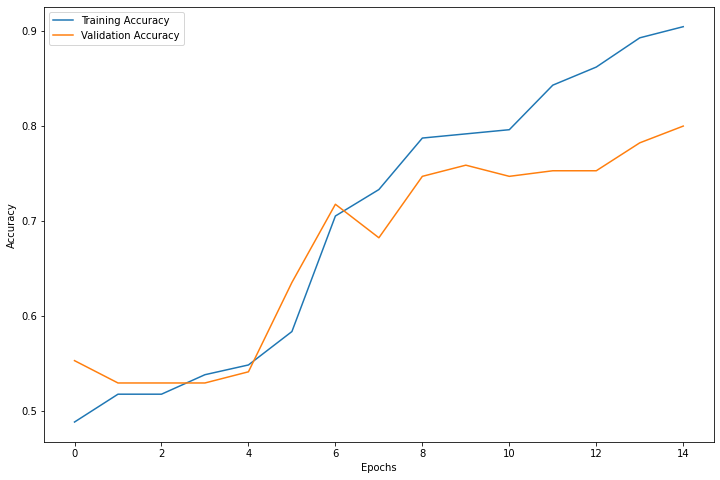

In [153]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

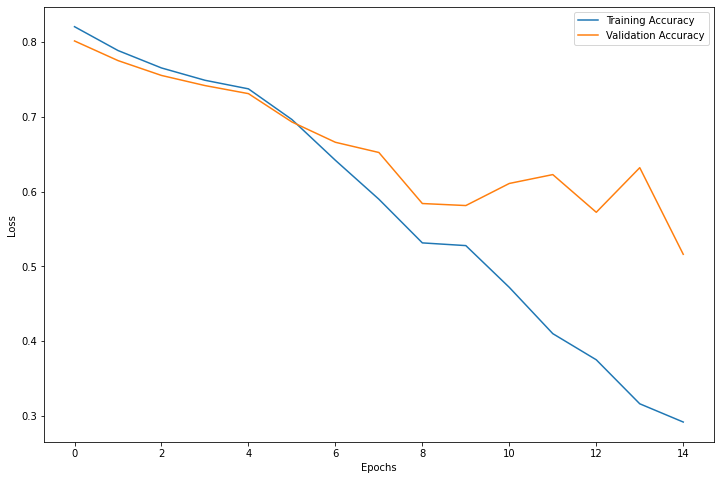

In [154]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'], label='Training Accuracy')
plt.plot(history.history['val_loss'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [158]:
model.save('model.h5')